##Vanilla Version -4 : Assigment 4 

###Installing Important weapons of DNN (keras)

In [0]:
# https://keras.io/
!pip install -q keras
import keras

###Installing Keras and related core assualts for using in Neural Network

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

###Loading pre-Shuffled MNIST DataSet in Training and Test 

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###We can confirm and see we have 60K sample images each of size 28x28, will plot and see sample images.

(60000, 28, 28)


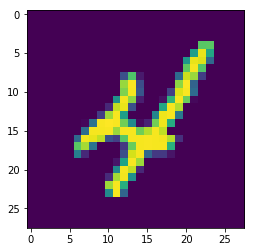

In [42]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[9])

###Preprocess input data for Keras.
>***A full-color image with all 3 RGB channels will have a depth of 3.Our MNIST images only have a depth of 1, but we must explicitly declare that.***

>***In other words, we want to transform our dataset from having shape (n, width, height) to (n, depth, width, height)***.

In [0]:
#Converting/Reshaping 2-D dimenional Grayscale image to keras specific 4-D input/output form
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###Preprocess class labels for Keras.
>***let's take a look at the shape of our class label data***


In [45]:
print(y_train.shape)

(60000,)



>***We should have 10 different classes, one for each digit, but it looks like we only have a 1-dimensional array.***

>***Let's take a look at the labels for the first 10 training samples:***

In [46]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values.

>***1. We can fix this easily:***

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

###Now have a look:

In [48]:
print (Y_train.shape)

(60000, 10)


In [49]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Define Model Architechture :

In [50]:
#Importing core Functions of Keras layers which will use in Neural Network
from keras.layers import Activation, BatchNormalization

#Now Will start with Sequential Model
model = Sequential()

#Adding Input Layer:
#Input Image size 28x28x1
#convolution filter/kernal size is 3x3x1 of count/row : 10
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
#BatchNorms will normalize weights using Mean, Variance of each channels pixel-wise in particular layer
model.add(BatchNormalization())
#adding Dropouts(10% drops in pixel values randomly) which drops random nueron/pixel in particular layer which helps model to learn other params exceplicitly
model.add(Dropout(0.1))

#Input image to these layer is 26x26x10
#Kernal/filter size : 3x3x10 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 24x24x10
#Kernal/filter size : 1x1x16 of number/count/row : 10
#1x1 convolution layer which helps to reduce channel size and increase particular features amplitude.
model.add(Convolution2D(10, 1, 1, activation='relu')) # 24

#MaxPooling2D is a way to reduce the number of parameters in our model by sliding a 2x2 pooling,
#filter across the previous layer and taking the max of the 4 values in the 2x2 filter.
model.add(MaxPooling2D(pool_size=(2, 2))) # 12
#model.add(Convolution2D(10, 1, 1, activation='relu')) # 12

#Input image to these layer is 12x12x10
#Kernal/filter size : 3x3x10 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 10x10x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 8x8x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

#Input image to these layer is 6x6x16
#Kernal/filter size : 3x3x16 of number/count/row : 16
model.add(Convolution2D(16, 3, 3, activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))

#model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4, 4))

#Before prediction layer we should flatten all convolution weights of neuron
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Conv2D` call to the Keras 2 API: `

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_12 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        170       
__________

###Compile the Model:
>***While compile the model we need to declare Loss Function and Optimizer***

>***Here we used Adam and categorical cross entropy as optimizer and loss function respectively***


In [59]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0025 * 1/(1 + 0.300 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=64, nb_epoch=20, verbose=1, validation_data=(X_test,Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.0025.
60000/60000 [==============================] - 14s 239us/step - loss: 0.0418 - acc: 0.9873 - val_loss: 0.0299 - val_acc: 0.9910
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0019230769.
60000/60000 [==============================] - 11s 178us/step - loss: 0.0303 - acc: 0.9901 - val_loss: 0.0373 - val_acc: 0.9890
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0015625.
60000/60000 [==============================] - 11s 189us/step - loss: 0.0278 - acc: 0.9909 - val_loss: 0.0281 - val_acc: 0.9915
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0013157895.
60000/60000 [==============================] - 10s 174us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0210 - val_acc: 0.9936
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0011363636.
60000/60000 [====

###Now hard part over, we need to train the model as epochs and batch size for training data and do validation with test data parallaly with each epochs
>1. Highest Validation accuracy ***99.41*** with params ***13k*** in epochs ***20*** and batch size ***128***

###Now Evaluating the model on test data 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [54]:
print(score)

[0.020378008055937973, 0.9935]


###Now prediction on Test data

In [0]:
y_pred = model.predict(X_test)

In [56]:
print(y_pred[:9])
print(y_test[:9])

[[2.37922293e-10 5.52884778e-08 1.52498657e-07 1.06326423e-08
  2.41576514e-09 4.10862793e-12 7.01217459e-13 9.99999762e-01
  1.12374755e-10 1.74577475e-09]
 [2.94693976e-08 2.91566676e-06 9.99997020e-01 1.29500977e-09
  1.46916548e-10 7.02123299e-12 2.75930550e-08 9.81197612e-09
  2.45052267e-09 3.95623096e-13]
 [2.02001615e-08 9.99997973e-01 1.35093901e-08 9.22825549e-09
  2.64500898e-07 3.02977440e-07 3.21258000e-07 1.11065469e-06
  2.32095694e-08 2.58989452e-09]
 [9.99978185e-01 4.29022894e-11 1.76271850e-08 2.58988808e-09
  5.91534322e-10 6.11927486e-09 2.07889952e-05 1.74513029e-10
  2.68276551e-07 8.56565578e-07]
 [5.79185896e-13 8.64226135e-10 1.05955782e-11 2.29977365e-12
  9.99997854e-01 2.41112720e-11 3.65486447e-10 7.06552428e-10
  5.43618171e-11 2.13714225e-06]
 [6.12242568e-09 9.99998927e-01 1.71229857e-08 1.62432789e-09
  1.36088886e-07 8.32158431e-09 4.46680843e-08 8.99111399e-07
  6.14703266e-09 5.20607424e-09]
 [1.46021942e-12 1.39291089e-07 2.18994517e-10 2.54654544e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

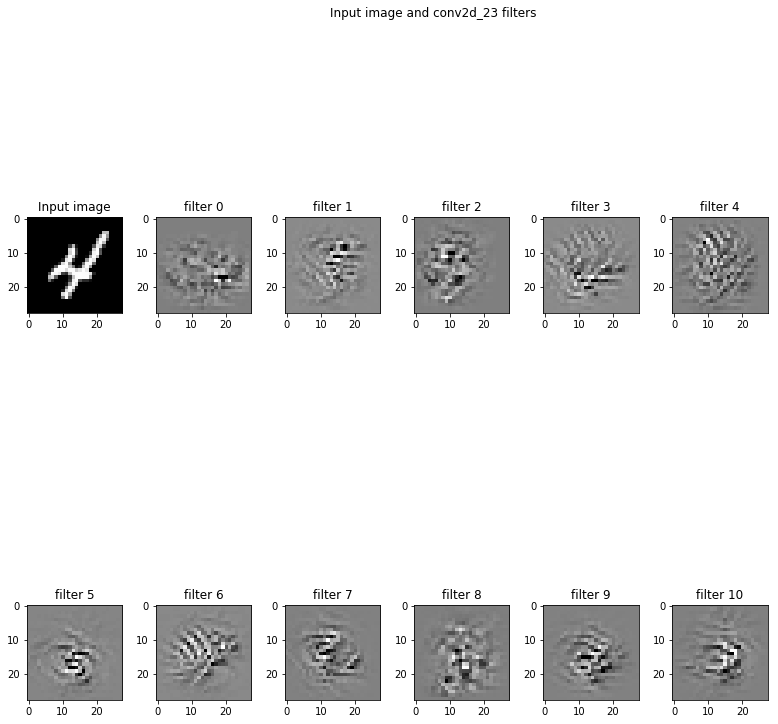

In [60]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[9]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_23'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()